<a href="https://colab.research.google.com/github/TZuanazzi/Quant/blob/main/quant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

____

In [55]:
#importing all libraries
# !pip install visualkeras      # <----------- Important!!! Install library in colab, if necessary
# !pip install yfinance
# !pip install pandas
# !pip install matplotlib
# !pip install tensorflow

In [56]:
# Start Google Drive...
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/MyDrive/Colab Notebooks/SML/article/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 1.3. Data preparation

First of all, let's load the dataset from file...
In order to better organize the data, some preliminary transformation were carried out:

* The time informatoin was better organized (timestamp)
* Time related rows were removed
* Number (_No_) row was removed


[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-07-02  24.969999  25.139999  24.870001  25.030001  18.458530  30197200
2014-07-03  25.150000  25.250000  25.129999  25.190001  18.576519  19598800
2014-07-07  25.000000  25.250000  24.969999  25.230000  18.606026  21293500
2014-07-08  25.209999  25.309999  25.059999  25.070000  18.488035  34622900
2014-07-09  25.219999  25.500000  25.139999  25.440001  18.760885  35610300
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2024-06-25  47.270000  47.820000  46.990002  47.380001  47.380001  17793600
2024-06-26  47.060001  47.410000  46.799999  46.860001  46.860001  13981300
2024-06-27  46.779999  47.509998  46.770000  47.450001  47.450001  16541900
2024-06-28  47.549999  47.860001  47.340000  47.509998  47.509998  23920100
2024-07-01  

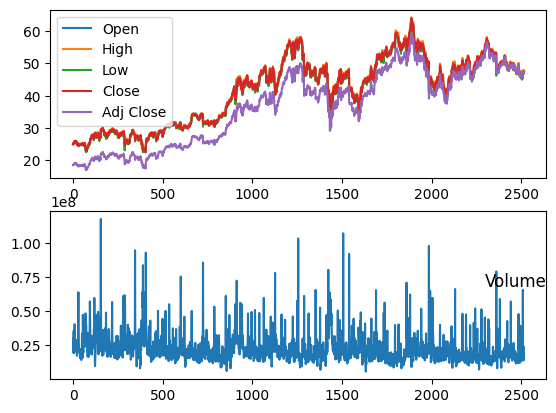

In [57]:
# Load dataset...

import yfinance as yf
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from datetime import datetime
import random
import numpy as np
import tensorflow as tf

# Defining the RNG
random.seed(22)
np.random.seed(42)
tf.random.set_seed(42)

# dataset = yf.download('PETR4.SA', period='10y')
dataset = yf.download('CSCO ', period='10y')
# print(dataset)

# Plot data...
value = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
 pyplot.subplot(2, 1, 1)
 pyplot.plot(value[:, group])
#  pyplot.title(dataset.columns[group], y=0.5, loc='right')
 pyplot.legend(dataset.columns[groups], loc='upper left')
 i += 1

pyplot.subplot(2, 1, 2)
pyplot.plot(value[:, 5])
pyplot.title(dataset.columns[5], y=0.5, loc='right')

print(dataset.head(5))
print(dataset.tail(5))
pyplot.show()


## 1.4. LSTM Data Preparation

In order to prepare the data to be presented to the LSTM, some aditional transformation were carried out:

* _NaNs_ were removed (replaced by 0)
* All features were normalized
<!--
After the transformation, all 6 **input variables refers to time "t-1"**, while the **output variable (pollution) refers to time "t"**. -->

In [58]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocess data
# Select the 'Close' price
print(dataset.shape)
dataset2 = dataset[['Close']]

# Convert the data to a numpy array
dataset2 = dataset2.values
print(dataset2.shape)
print(dataset2)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset2)

# Define training data length
years_training = int(np.ceil(250*(2)))  # how many years before the test will be used?
month_test = int(np.ceil(21*(2)))  # how many months before yesterday will be udes for test
# training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Create the training data set
train_data = scaled_data[-(years_training + month_test):-month_test, :]
print(scaled_data.shape)
print(train_data.shape)
print(scaled_data[-(month_test)-5:-(month_test)])
print(train_data[-5:])

(2516, 6)
(2516, 1)
[[25.03000069]
 [25.19000053]
 [25.22999954]
 ...
 [47.45000076]
 [47.50999832]
 [47.52000046]]
(2516, 1)
(500, 1)
[[0.62340166]
 [0.6173703 ]
 [0.61158024]
 [0.60965016]
 [0.59034982]]
[[0.62340166]
 [0.6173703 ]
 [0.61158024]
 [0.60965016]
 [0.59034982]]


(2516, 6)
(2515, 1)
[[-0.00635172]
 [-0.00158537]
 [ 0.00638212]
 ...
 [-0.01243414]
 [-0.00126284]
 [-0.00021048]]


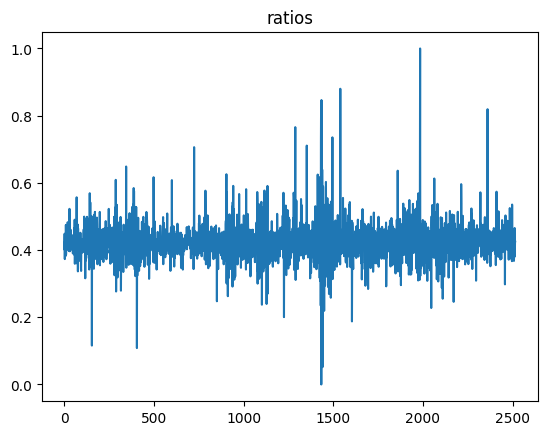

(2515, 1)
(500, 1)
[[0.42342989]
 [0.44442457]
 [0.44376447]
 [0.43171101]
 [0.48711791]]
[[0.42342989]
 [0.44442457]
 [0.44376447]
 [0.43171101]
 [0.48711791]]


In [59]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocess data
# Select the 'Close' price
print(dataset.shape)
data = dataset[['Close']]

a = np.array(data[1:])
b = np.array(data[:-1])
a[a == 0] = 0.1
b[b == 0] = 0.1
ratios = ((b /a)-1)
print(ratios.shape)
print(ratios)

# Normalize the data
scaler_ratio = MinMaxScaler(feature_range=(0, 1))
scaled_data_ratio = scaler_ratio.fit_transform(ratios)

# Define training data length
years_training = int(np.ceil(250*(2)))  # how many years before the test will be used?
month_test = int(np.ceil(21*(2)))  # how many months before yesterday will be udes for test
# training_data_len = int(np.ceil(len(scaled_data) * 0.8))


# plot each column
pyplot.figure()
pyplot.plot(scaled_data_ratio)
pyplot.title('ratios')
pyplot.show()

# Create the training data set
train_data = scaled_data_ratio[-(years_training + month_test):-month_test, :]
print(scaled_data_ratio.shape)
print(train_data.shape)
print(scaled_data_ratio[-(month_test)-5:-(month_test)])
print(train_data[-5:])

In [60]:
def create_dataset(data, years_tng, month_tst, time_step=1):
    X_train, X_test, y_train, y_test = [], [], [], []
    years_training = int(np.ceil(250*(2)))  # how many years before the test will be used?
    month_test = int(np.ceil(21*(2)))  # how many months before yesterday will be udes for test
    print(len(data.shape))
    for i in range(years_training):
      tng = data[i-(years_training + month_test + time_step):(i)-(years_training + month_test), ]
      X_train.append(tng)
      y_train.append(data[i - (years_training + month_test), ])

    for i in range(month_test):
      tst = data[i-(month_test + time_step):(i)-(month_test), ]
      X_test.append(tst)
      y_test.append(data[i - (month_test), ])

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

# train_data = scaled_data[-(years_training + month_test):-month_test, :]
# number of previus values used to predict the next value
time_step = 1*21 # 21 days per month
X_train, y_train, X_test, y_test = create_dataset(scaled_data_ratio, 2, 2, time_step)
# print(scaled_data_ratio.shape)
print(X_train.shape)
print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
# print(X_train[1:2])
# print(y_train[:1])

# Reshape the input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

2
(500, 21, 1)
(500, 1)
(500, 21, 1)


In [72]:
import os
import time
import tensorflow
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# List available physical GPUs
physical_devices = tf.config.list_physical_devices('GPU')
print("Available Physical GPUs:", len(physical_devices))

# If GPUs are available, configure GPU memory growth
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Build the model

def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(16, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dense(16))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Callbacks for early stopping and saving the best model
early_stop = EarlyStopping(monitor='val_loss', patience=50 ,restore_best_weights=True) #val_loss
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss',verbose=1, save_best_only=True, mode='min')



Available Physical GPUs: 0


In [75]:
year = 2      # how many years of training before months to tests, a year has 250 days
month = 2     # how many months to be used to test before yesterday, a month has 21 days
days = 15      # how many days will be used as input for the predction, a week has 5 days
lr = 5e-4     # Learning Rate
batch = 128   # batch size
epochs = 5000  # fow how many times the training will ocurr
# save_model = True #save the best model using the "val_loss" metric #### to me added

# Update the dataset to specifications
# X_train, y_train, X_test, y_test = create_dataset(scaled_data_ratio, year, month, days)  # ratio between days
X_train, y_train, X_test, y_test = create_dataset(scaled_data, year, month, days)        # true value of each day

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model = build_model((X_train.shape[1], 1))
history = model.fit(X_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, callbacks=[model_checkpoint])

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 3751/5000
4/4 [==============================] - ETA: 0s - loss: 9.2687e-04
Epoch 3751: val_loss did not improve from 0.00013
4/4 [==============================] - 2s 727ms/step - loss: 9.2687e-04 - val_loss: 1.4129e-04
Epoch 3752/5000
4/4 [==============================] - ETA: 0s - loss: 8.8351e-04
Epoch 3752: val_loss did not improve from 0.00013
4/4 [==============================] - 1s 144ms/step - loss: 8.8351e-04 - val_loss: 1.3801e-04
Epoch 3753/5000
4/4 [==============================] - ETA: 0s - loss: 9.2535e-04
Epoch 3753: val_loss did not improve from 0.00013
4/4 [==============================] - 1s 173ms/step - loss: 9.2535e-04 - val_loss: 1.6226e-04
Epoch 3754/5000
4/4 [==============================] - ETA: 0s - loss: 8.8533e-04
Epoch 3754: val_loss did not improve from 0.00013
4/4 [==============================] - 1s 387ms/step - loss: 8.8533e-04 - val_loss: 1.4383e-04
Epoch 3755/5000
4/4 [============

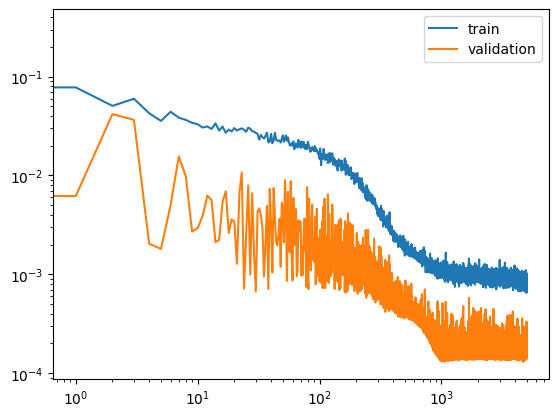

In [76]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

In [77]:
# Reshape the data
print(X_test.shape)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the model's predicted price values
# print(X_test.shape)
predictions = model.predict(X_test)
# print(predictions.shape)
# predictions = scaler_ratio.inverse_transform(predictions)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - scaler.inverse_transform(y_test.reshape(-1, 1))) ** 2)))
print('RMSE:', rmse)

train = data[-(years_training + month_test):-month_test]
# train = y_train
valid = data[-month_test:]
# valid = y_test
valid['Predictions'] = predictions[:]

(42, 15, 1)
2/2 [==============================] - 5s 2s/step
RMSE: 0.5157969346868543


<ipython-input-77-c223af29be77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:]


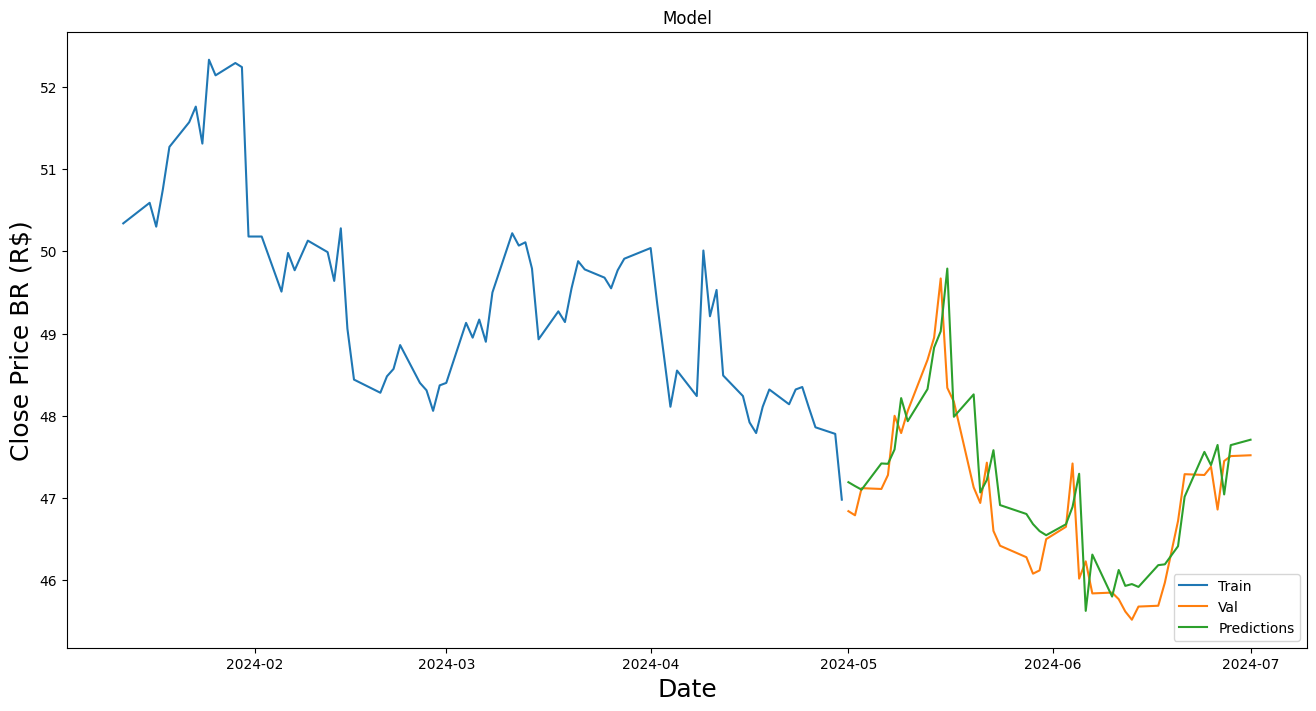

In [78]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price BR (R$)', fontsize=18)
plt.plot(train[-75:])
# plt.plot(dataset[:])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


(42, 2)
(500, 1)


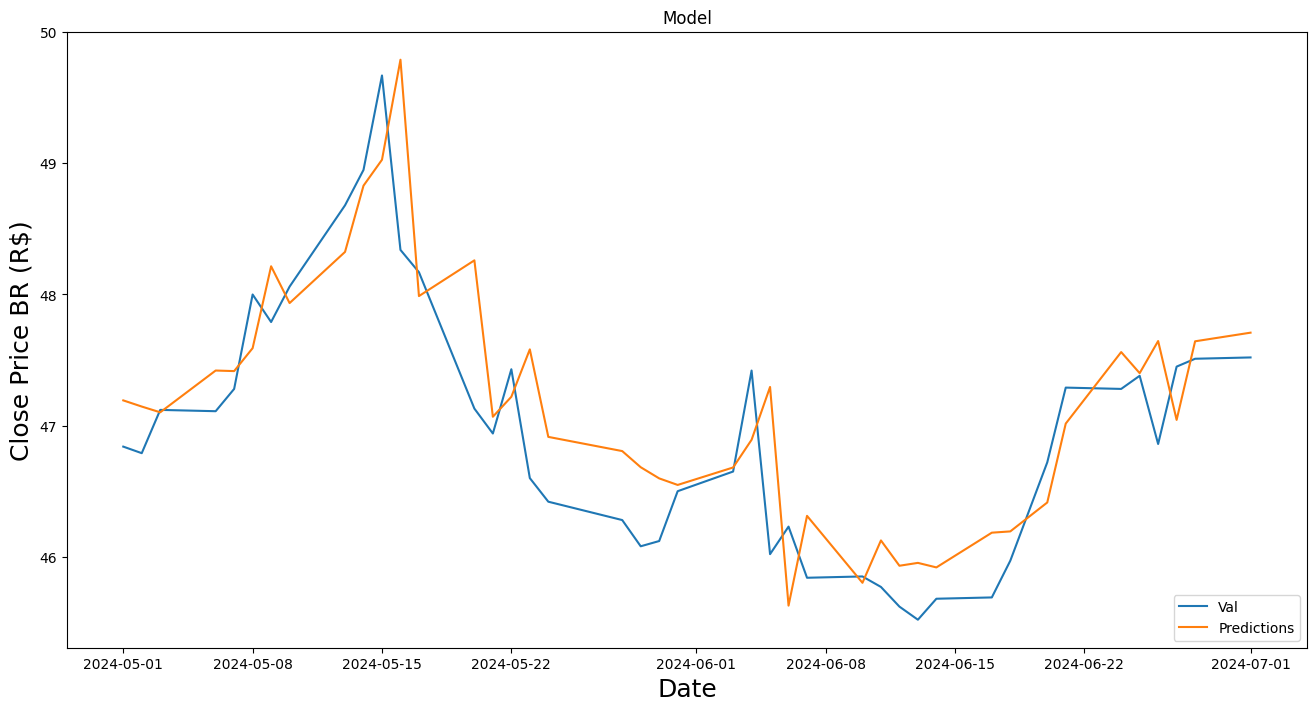

In [79]:
print(valid.shape)
print(train.shape)
# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price BR (R$)', fontsize=18)
# plt.plot(y_test)
# plt.plot(predictions)
plt.plot(valid[['Close','Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Calculate the difference
def calculate_a_ratio(val, predictions):
  return ((np.array(val) / ((np.array(predictions))))-1)*100

def calculate_change_ratio(val):
  print(val.shape)
  a = np.array(val[1:])
  b = np.array(val[:-1])
  ratios = ((a / b)-1)*100
  # print(ratios)
  return ratios

ratio = calculate_a_ratio(valid[['Close']], valid[['Predictions']])
print(1+np.mean(ratio)/100)
differences = calculate_change_ratio(valid[['Close']])

# print(differences)
# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price %', fontsize=18)
plt.plot(differences)
plt.plot(ratio)
plt.legend(['differences', 'ratio'], loc='lower right')
plt.show()

In [ ]:

def predict_next_month(model_path, data, scaler, time_step=21):
    """
    Predict the next month's closing prices using a trained LSTM model.

    Parameters:
    - model_path: Path to the trained LSTM model.
    - data: Historical data used for training the model.
    - scaler: Scaler used to normalize the data.
    - time_step: Number of previous time steps used to make a prediction.

    Returns:
    - predictions: Predicted closing prices for the next month.
    """
    # Load the trained model
    model = load_model(model_path)

    # Get the last `time_step` days from the data
    last_days = data[- time_step - 21:-21]
    scaled_last_days = scaler.transform(last_days)

    # Prepare the input data for prediction
    X_pred = []
    X_pred.append(scaled_last_days)
    X_pred = np.array(X_pred)
    X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))

    # Predict the next month (20 trading days)
    predictions = []
    for i in range(20):
        pred = model.predict(X_pred)
        predictions.append(pred[0, 0])

        # Update the input data with the latest prediction
        scaled_last_days = np.append(scaled_last_days[1:], pred)
        X_pred = np.reshape(scaled_last_days, (1, time_step, 1))

    # Inverse transform the predictions to get the actual values
    predictions = np.array(predictions).reshape(-1, 1)
    predictions = scaler.inverse_transform(predictions)

    return predictions

# Assuming you have the model saved at 'best_model.h5', data, and scaler
next_month_predictions = predict_next_month('/content/drive/MyDrive/Colab Notebooks/SML/article/model_64', data.values, scaler)

print("Next month's predicted closing prices:")
print(next_month_predictions)

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price BR (R$)', fontsize=18)
b = np.array(next_month_predictions)
plt.plot(b)
plt.plot(np.array(a[21:]))
plt.legend(['next', 'a'], loc='lower right')
plt.show()

In [ ]:
# Train multiple models and compare the loss final value and curve
histories_loss = []
histories_val_loss = []
histories_training_time = []
best_models = []
# batch = [256, 128, 84, 64, 63, 42, 32, 21, 16, 8, 5, 4, 2, 1]

for i in batch:
    # Measure training time
    start_time = time.time()
    model = build_model((X_train.shape[1], 1))
    history = model.fit(X_train, y_train, batch_size=i, epochs=epochs, validation_split=0.2, callbacks=[model_checkpoint])
    end_time = time.time()
    training_time = end_time - start_time
    historie=[]
    histories_loss.append(history.history['loss'])
    histories_val_loss.append(history.history['val_loss'])
    histories_training_time.append(training_time)
    # Clear previous models and sessions
    if os.path.exists('best_model.h5'):
      best_model = load_model('best_model.h5')
      best_model.save(path + 'model_' + str(i))
      best_models.append(load_model('best_model.h5'))
      os.remove('best_model.h5')
      tf.keras.backend.clear_session()

# Load the best model, use i to select te model
i = 64  #edit to select model to be used
if os.path.exists('best_model.h5'):
  best_model = load_model('best_model.h5')
else:
  best_model = load_model(path + 'model_' + str(i))